<a href="https://colab.research.google.com/github/RicStrong/JobPostingAnalysis/blob/master/JobPostingsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Getting Set Up, Downloading the Data

https://www.kaggle.com/promptcloud/us-job-data-careerbuildercom-2019


This dataset was extracted and uploaded for the main reason for researchers, students, and companies that want to position themselves strategically in the various fields of recruiting candidates for their organizations. Students and researchers can use this dataset to come up with different case studies and project manuals for the same.

The File Contains the Following Fields:

1. Unique ID
2. Crawl TimeStamp
3. URL
4. Job Title
5. Company
6. City
7. Branch
8. State
9. Country
10. Post Date
11. Job Description
12. Job Category

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [2]:
!sudo -H pip3 install spacy
!python -m spacy download en_core_web_sm
!pip install --upgrade pip
!pip install textacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 1.5MB 6.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 206 kB 7.9 MB/s 
     |████████████████████████████████| 133 kB 8.9 MB/s 
     |████████████████████████████████| 475 kB 14.2 MB/s 
     |████████████████████████████████| 3.0 MB 23.4 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73012 sha256=f2cb621bb3da433aad6b501b952a2e0813645446c68a27fa948f85af6670f33c
  Stored in directory: /root/.cache/pip/wheels/3b/de/5e/9a80586358562caf9f6b3913b998e45508b5748bce9a45d419
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1257641 sha256=099ebbd4fd4ae89e3941170ea1217cfb180424a45dee9be833f95844d6347a83
  Stored in directory: /root/.cache/pip/wheels/ae/29/ee/95cfb68

In [0]:
#Get the json file for the API key
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d promptcloud/us-job-data-careerbuildercom-2019

 76% 33.0M/43.5M [00:01<00:00, 25.5MB/s]
100% 43.5M/43.5M [00:01<00:00, 40.9MB/s]


In [44]:
!unzip \*.zip

Archive:  us-job-data-careerbuildercom-2019.zip
replace home/sdf/marketing_sample_for_careerbuilder_com-jobs__20190901_20191231__30k_data.ldjson? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: home/sdf/marketing_sample_for_careerbuilder_com-jobs__20190901_20191231__30k_data.ldjson  


###Imports!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import random
from collections import Counter #for counting
import json

def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
#from IPython.display import Markdown, display
#def printmd(string, color=None):
 #   colorstr = "<span style='color:{}'>{}</span>".format(color, string)
 #   display(Markdown(colorstr))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Setting the Data Frame

In [93]:
df = pd.read_json (r'home/sdf/marketing_sample_for_careerbuilder_com-jobs__20190901_20191231__30k_data.ldjson', lines=True)
df = df[['job_description']]
df

,job_description
0,"ABOUT THE JOB (JOB BRIEF):At Key, we have the ..."
1,ABOUT THE JOB (JOB BRIEF): Focuses on acquisit...
2,Important Note: During the application process...
3,Ref ID: 00412-9502197509Classification: Portfo...
4,Tentative Schedule: Must be available to work ...
...,...
30001,TransPerfect Is More Than Just a Job…Our great...
30002,About the Company Our client is a growing and ...
30003,Summary: The Veterinary Assistant is a key mem...
30004,Basic Qualifications Bachelor's degree in Logi...


###Exploring the data

In [0]:
#Lots of missing values!!
#df.isna().mean() * 100

###Looking at entities in the text

In [0]:
nlp = spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [56]:
explain_text_entities(df['job_description'][55])

Entity: Kforce, Label: ORG, Companies, agencies, institutions, etc.
Entity: Boston, Label: GPE, Countries, cities, states
Entity: Massachusetts, Label: GPE, Countries, cities, states
Entity: The Billing Administrator, Label: ORG, Companies, agencies, institutions, etc.
Entity: REQUIREMENTS, Label: ORG, Companies, agencies, institutions, etc.
Entity: Bachelor, Label: ORG, Companies, agencies, institutions, etc.
Entity: 3+ years, Label: DATE, Absolute or relative dates or periods
Entity: Microsoft Word, Label: PRODUCT, Objects, vehicles, foods, etc. (not services)
Entity: Excel, Label: PRODUCT, Objects, vehicles, foods, etc. (not services)
Entity: Outlook Kforce, Label: PERSON, People, including fictional


###Looking at Noun Chunks in the text

In [74]:
#noun chunks!
example_text = df['job_description'][55]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'RESPONSIBILITIES'
sentence 2 has noun chunk 'Kforce'
sentence 2 has noun chunk 'their search'
sentence 2 has noun chunk 'a Billing Administrator'
sentence 2 has noun chunk 'Boston'
sentence 2 has noun chunk 'Massachusetts'
sentence 2 has noun chunk 'MA'
sentence 3 has noun chunk 'The Billing Administrator'
sentence 3 has noun chunk 'a team'
sentence 3 has noun chunk 'various consultants'
sentence 3 has noun chunk 'their assistants'
sentence 3 has noun chunk 'other timekeepers'
sentence 3 has noun chunk 'client billing'
sentence 3 has noun chunk 'accordance'
sentence 3 has noun chunk 'established firm and client policies'
sentence 3 has noun chunk 'procedures'
sentence 4 has noun chunk 'Job Requirements'
sentence 5 has noun chunk 'Bachelor's degree'
sentence 5 has noun chunk '3+ years'
sentence 5 has noun chunk 'billing experience'
sentence 5 has noun chunk 'Previous consulting'
sentence 5 has noun chunk 'accounting'
sentence 5 has noun chunk 'law firm experie

###Looking at Tokens in the text

In [58]:
one_sentence = df['job_description'][55]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

RESPONSIBILITIES NOUN
: PUNCT
Kforce PROPN
is AUX
working VERB
with ADP
a DET
prestigious ADJ
professional ADJ
services NOUN
firm ADJ
in ADP
their DET
search NOUN
for ADP
a DET
Billing PROPN
Administrator NOUN
in ADP
Boston PROPN
, PUNCT
Massachusetts PROPN
( PUNCT
MA PROPN
) PUNCT
. PUNCT
The DET
Billing PROPN
Administrator PROPN
is AUX
responsible ADJ
for ADP
working VERB
as SCONJ
a DET
team NOUN
and CCONJ
with ADP
various ADJ
consultants NOUN
, PUNCT
their DET
assistants NOUN
, PUNCT
and CCONJ
other ADJ
timekeepers NOUN
on ADP
preparing VERB
client NOUN
billing NOUN
in ADP
accordance NOUN
with ADP
established VERB
firm NOUN
and CCONJ
client NOUN
policies NOUN
and CCONJ
procedures NOUN
. PUNCT
Job PROPN
Requirements NOUN
REQUIREMENTS NOUN
: PUNCT
Bachelor PROPN
's PART
degree NOUN
preferred VERB
3 NUM
+ CCONJ
years NOUN
of ADP
billing NOUN
experience NOUN
is AUX
required VERB
Previous ADJ
consulting NOUN
, PUNCT
accounting NOUN
, PUNCT
or CCONJ
law NOUN
firm NOUN
experience NOUN
pref

###Combining descriptions into one text block

In [0]:
text = df['job_description'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

###Exploring the text

In [61]:
# how many unique characters do we see? 
# For reference, ASCII has 127 characters in it - so we expect this to have at most 127 characters
unique_chars = list(set(text))
unique_chars.sort()
print(unique_chars)
print(f'There are {len(unique_chars)} unique characters, including both ASCII and Unicode character')

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\x80', '\x93', '\x99', '\x9c', '\x9d', '¢', '¦', '§', '©', '®', '²', '·', '¹', '½', '¿', 'Â', 'Æ', 'â', 'é', 'ü', '‐', '–', '—', '‘', '’', '“', '”', '•', '…', '™', '●', '\uf0b7', '\ufeff']
There are 123 unique characters, including both ASCII and Unicode character


In [65]:
len(text)

975274

In [66]:
words = text.split()
print(len(words))

140679


###Exploring sentences

In [71]:
sentences = list(doc.sents)
print(sentences[1:3])

[Key, we have the opportunity to bring ease value and expertise to our clients by helping them have confidence and the peace of mind to dream big., As a Teller, you will report to the Branch Manager or to the Operations Leader (Teller Float) and are the initial contact for clients.]


###Stemming and Lemmatization

In [75]:
lemma_sentence_example = "Key, we have the opportunity to bring ease value and expertise to our clients by helping them have confidence and the peace of mind to dream big."
[(token, token.lemma_, token.lemma, token.pos_ ) for token in nlp(lemma_sentence_example)]

[(Key, 'key', 12247610008914253561, 'ADJ'),
 (,, ',', 2593208677638477497, 'PUNCT'),
 (we, '-PRON-', 561228191312463089, 'PRON'),
 (have, 'have', 14692702688101715474, 'AUX'),
 (the, 'the', 7425985699627899538, 'DET'),
 (opportunity, 'opportunity', 9751084440329135938, 'NOUN'),
 (to, 'to', 3791531372978436496, 'PART'),
 (bring, 'bring', 3597906902382212429, 'VERB'),
 (ease, 'ease', 5242445065284087879, 'NOUN'),
 (value, 'value', 1345584765475359109, 'NOUN'),
 (and, 'and', 2283656566040971221, 'CCONJ'),
 (expertise, 'expertise', 6357704645912119224, 'NOUN'),
 (to, 'to', 3791531372978436496, 'ADP'),
 (our, '-PRON-', 561228191312463089, 'DET'),
 (clients, 'client', 10852021146411011557, 'NOUN'),
 (by, 'by', 16764210730586636600, 'ADP'),
 (helping, 'help', 17461235395181654430, 'VERB'),
 (them, '-PRON-', 561228191312463089, 'PRON'),
 (have, 'have', 14692702688101715474, 'AUX'),
 (confidence, 'confidence', 3390575192292492200, 'NOUN'),
 (and, 'and', 2283656566040971221, 'CCONJ'),
 (the, 'th

###Items of intreest, topics, nouns, visualizations

In [0]:
doc = nlp(text)

In [0]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

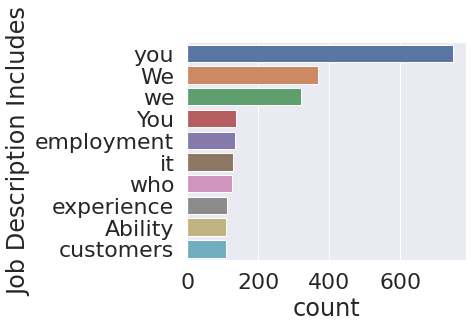

In [81]:
df_nouns = pd.DataFrame(items_of_interest, columns=["Job Description Includes"])
plt.figure(figsize=(5,4))
sns.countplot(y="Job Description Includes",
             data=df_nouns,
             order=df_nouns["Job Description Includes"].value_counts().iloc[:10].index)
plt.show()

In [0]:
posting_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        posting_topics.append(token)
        
posting_topics = [str(x) for x in posting_topics]

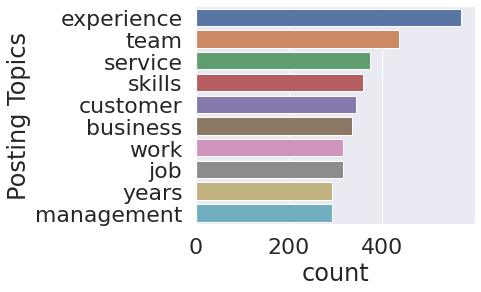

In [83]:
df_nouns = pd.DataFrame(posting_topics, columns=["Posting Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Posting Topics",
             data=df_nouns,
             order=df_nouns["Posting Topics"].value_counts().iloc[:10].index)
plt.show()

In [0]:
posting_topics = []
for ent in doc.ents:
    if ent.label_ in ["PERSON", "NORP", "ORG", "PRODUCT"]:
#         print(ent.text,ent.label_)
        posting_topics.append(ent.text.strip())

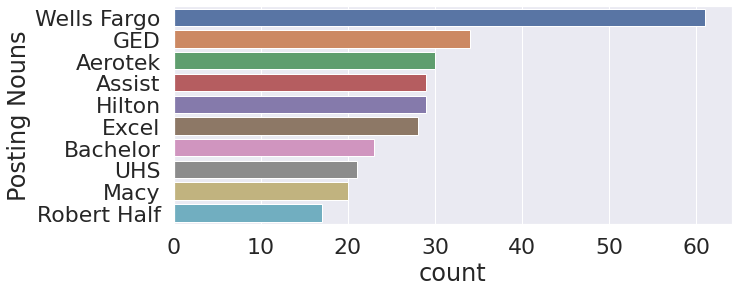

In [85]:
df_ttopics = pd.DataFrame(posting_topics, columns=["Posting Nouns"])
plt.figure(figsize=(10,4))
sns.countplot(y="Posting Nouns",
             data=df_ttopics,
             order=df_ttopics["Posting Nouns"].value_counts().iloc[0:10].index)

#plt.savefig("abc.png")
#files.download("abc.png") 
plt.show()

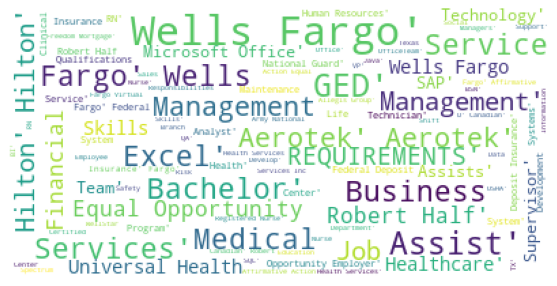

In [88]:
#from spacy.lang.en.stop_words import STOP_WORDS
#from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=100,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(posting_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()